In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


In [7]:
# Reading the dataset
df = pd.read_csv('D:\\AILab\\healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [8]:
df.isnull().sum()


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [10]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


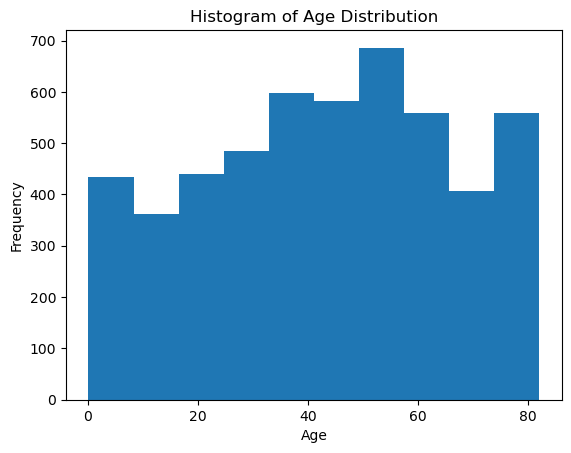

In [11]:
plt.hist(df["age"], bins=10)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Histogram of Age Distribution")
plt.show()


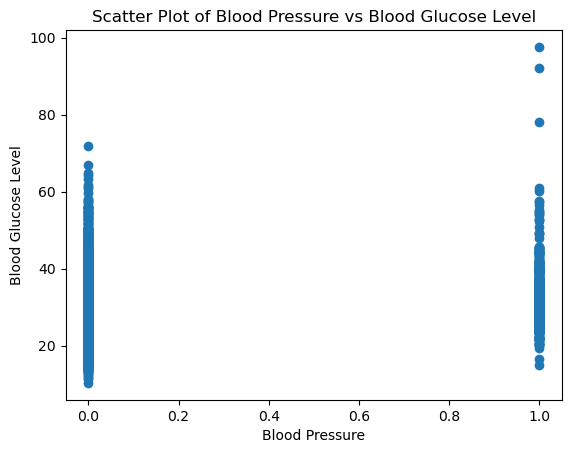

In [12]:
plt.scatter(df["hypertension"], df["bmi"])
plt.xlabel("Blood Pressure")
plt.ylabel("Blood Glucose Level")
plt.title("Scatter Plot of Blood Pressure vs Blood Glucose Level")
plt.show()


In [13]:
nominal_cols = ["bmi"]
df[nominal_cols] = df[nominal_cols].astype("category")
df[nominal_cols] = df[nominal_cols].apply(lambda x: x.cat.codes)
df[nominal_cols] 

,bmi
0,239
1,-1
2,198
3,217
4,113
...,...
5105,-1
5106,273
5107,179
5108,129


In [14]:
X = df.drop(['stroke','bmi'], axis=1)
y = df['stroke']



In [15]:
X = pd.get_dummies(X, drop_first=True)
X

,id,age,hypertension,heart_disease,avg_glucose_level,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,1,0,1,0,1,0,0,1,1,0,0
1,51676,61.0,0,0,202.21,0,0,1,0,0,1,0,0,0,1,0
2,31112,80.0,0,1,105.92,1,0,1,0,1,0,0,0,0,1,0
3,60182,49.0,0,0,171.23,0,0,1,0,1,0,0,1,0,0,1
4,1665,79.0,1,0,174.12,0,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,83.75,0,0,1,0,1,0,0,1,0,1,0
5106,44873,81.0,0,0,125.20,0,0,1,0,0,1,0,1,0,1,0
5107,19723,35.0,0,0,82.99,0,0,1,0,0,1,0,0,0,1,0
5108,37544,51.0,0,0,166.29,1,0,1,0,1,0,0,0,1,0,0


In [16]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Building the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predicting the test set results
y_pred = log_reg.predict(X_test)

# Evaluating the model performance
accuracy = log_reg.score(X_test, y_test)
print(f"Accuracy of the logistic regression model: {accuracy:.2f}")

Accuracy of the logistic regression model: 0.94


<Axes: xlabel='age', ylabel='avg_glucose_level'>

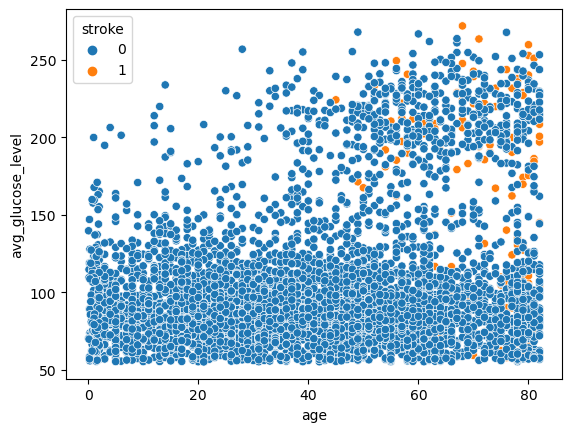

In [17]:
import seaborn as sns

sns.scatterplot(x='age', y='avg_glucose_level', hue='stroke', data=df)


In [18]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100,random_state=0)
regressor.fit(X_train,y_train)
#Evaluating the model
train_accuracy=regressor.score(X_train,y_train)
print('train_accuracy(R_Squared):',train_accuracy)
test_accuracy=regressor.score(X_test,y_test)
print('test_accuracy(R_squared):',test_accuracy)


train_accuracy(R_Squared): 0.8578300832235879
test_accuracy(R_squared): 0.029279722369198846


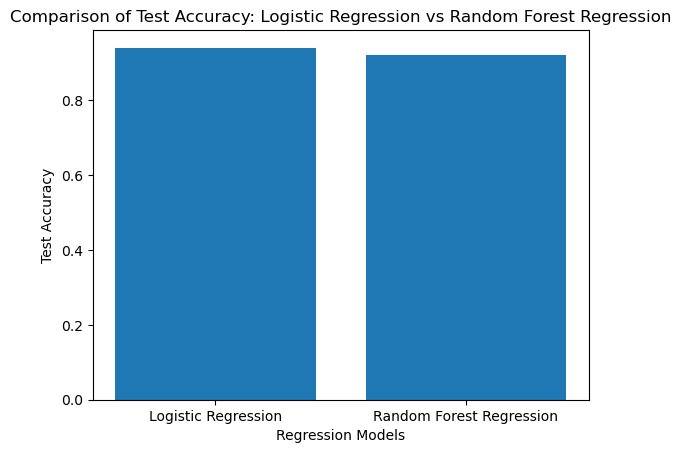

In [19]:
logistic_regression_accuracy =0.94
random_forest_accuracy =0.92
accuracy_scores = [logistic_regression_accuracy, random_forest_accuracy]
model_names = ['Logistic Regression', 'Random Forest Regression']
plt.bar(model_names, accuracy_scores)
plt.xlabel('Regression Models')
plt.ylabel('Test Accuracy')
plt.title('Comparison of Test Accuracy: Logistic Regression vs Random Forest Regression')
plt.show()
